<h2> Application Logistic Regression for determining the bridge condition</h2>
<h3> Train Data are from bridge investigated in 2022 and Test data is for bridges evaluated in 2023 but not in 2022 </h3>
<h2>...</h2>
<h2>..</h2>
<h2>Lets GO!!!!</h2>

In [1]:
!pip install matplotlib_map_utils
!pip install numpy==1.25.0. 
!pip install geopandas
!pip install scikit-learn

  Using cached numpy-1.25.0.tar.gz (10.4 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [33 lines of output]
  Traceback (most recent call last):
    File "C:\Users\Sushant\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\Sushant\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\Sushant\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 112, in get_requires_for_build_wheel
      backend = _build_backend()
                ^^^^^^^^^^^^^^^^
    File "C:\Users\Sushant\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 77, in _build_backend
      obj = import_module(mod_path)
            ^^^^^^^^^^^^^

In [7]:
#Import libraries
import os #Operating System interactions
import pandas as pd #Panel Data - for working with tabular data
import geopandas as gp # for GIS analysis or Geo Processing
from shapely.geometry import Point #Allows you to vreate gpkg files from xy data
import numpy as np #Numerical Calc
from matplotlib import pyplot as plt 
import matplotlib_map_utils as mapu #Alias of Map Utils like 'plt' for plot. For North Arrow.

In [8]:
#Set the directories
path = 'C:/Users/Sushant/OneDrive - Lamar University/1st semester/GIS/Project/Mini Project 1/Trial 2'
os.chdir(path) #Change the directory to that path

In [9]:
fname1 = 'Texas_County_Boundaries_Detailed_-8171692547258718760.gpkg'
texas = gp.read_file(fname1)

In [10]:
# Reproject the data to WGS84 (EPSG:4326)
texas_wgs84 = texas.to_crs(epsg=4326)

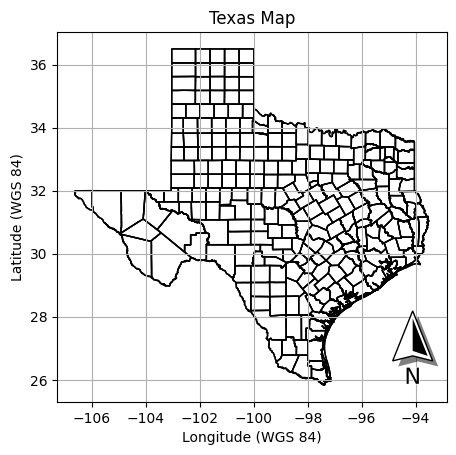

In [11]:
#Visualize the overlay result (you can customise this based on your needs)
fig = plt.figure()
ax1 = fig.add_subplot() #we have multiple layers being added, so when we have to plot multiple layers on the plot, we need to make sure all of them are plotted on the same axis.
texas_wgs84.plot (facecolor='white', edgecolor='black', ax=ax1) #ax=ax1 - overlaping axis. 
texas_wgs84.plot(ax=ax1, color='none', markersize=1)
mapu.north_arrow.north_arrow(ax=ax1, location='lower right', rotation={'degrees':0}) 
ax1.set_xlabel('Longitude (WGS 84)')
ax1.set_ylabel('Latitude (WGS 84)')
plt.grid()
plt.title ('Texas Map')
plt.show()

In [13]:
#Read the data from the csv files for all the bridges from 2022 and 2023
df_2023 = pd.read_csv('Bridge_2023.csv')
df_2022 = pd.read_csv('Bridge_2022.csv')
df_2023_new = pd.read_csv('new_bridges_2023.csv')

C:\Users\Sushant\AppData\Local\ipykernel_15904\693471169.py:2: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv('Bridge_2023.csv')
C:\Users\Sushant\AppData\Local\ipykernel_15904\693471169.py:3: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv('Bridge_2022.csv')


In [16]:
# Step 2: Identify the structure numbers in df_2023_new
structure_numbers_to_remove = df_2023_new['STRUCTURE_NUMBER_008']

# Step 3: Remove rows from df_2023 where STRUCTURE_NUMBER_008 is in df_2023_new
df_2023_2022_filtered = df_2023[~df_2023['STRUCTURE_NUMBER_008'].isin(structure_numbers_to_remove)]

# Step 4: Save the result to a new CSV file or use it further
df_2023_2022_filtered.to_csv('Bridge_2023_filtered.csv', index=False)


In [132]:
df_2023_2022_filtered['AGE'] = 2024 - df_2023_filtered['YEAR_BUILT_027']

C:\Users\Sushant\AppData\Local\ipykernel_14908\906933701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_2022_filtered['AGE'] = 2024 - df_2023_filtered['YEAR_BUILT_027']


In [133]:
#Bridge surved in 2023 and 2022, but removing those which were not surved in 2022.
df_2023_2022 = df_2023_2022_filtered[['STRUCTURE_NUMBER_008', 'LAT_016', 'LONG_017', 'DECK_COND_058', 
                  'SUPERSTRUCTURE_COND_059', 'CHANNEL_COND_061', 'ADT_029', 
                   'DECK_AREA', 'MAX_SPAN_LEN_MT_048','AGE']].copy()

In [134]:
print(df_2023_2022)

      STRUCTURE_NUMBER_008     LAT_016     LONG_017 DECK_COND_058  \
0          0000000L2015318  35185702.0  101560762.0             N   
1          000021521-00101  29362100.0   94272880.0             6   
2          000021521-00181  29362940.0   94254920.0             7   
3          000021521-TMP20  29365160.0   94324020.0             7   
4          000021525-00012  29413300.0   94044860.0             6   
...                    ...         ...          ...           ...   
38133      161780174201006  27475941.0   97370977.0             7   
38134      161780207702001  27541689.0   97525139.0             6   
38135      161780207702002  27531467.0   97510129.0             6   
38136      161780207702003  27523216.0   97494656.0             N   
38137      161780207702004         NaN          NaN           NaN   

      SUPERSTRUCTURE_COND_059 CHANNEL_COND_061  ADT_029  DECK_AREA  \
0                           N                6    100.0     169.84   
1                           7  

In [135]:
df_2023_new['AGE'] = 2024 - df_2023_new['YEAR_BUILT_027']

In [136]:
#Bridge surved in 2023 were not surved in 2022.
df_2023_new = df_2023_new[['STRUCTURE_NUMBER_008', 'LAT_016', 'LONG_017', 'DECK_COND_058', 
                  'SUPERSTRUCTURE_COND_059', 'CHANNEL_COND_061', 'ADT_029', 
                   'DECK_AREA', 'MAX_SPAN_LEN_MT_048','AGE']].copy()

In [137]:
print(df_2023_new)

    STRUCTURE_NUMBER_008    LAT_016   LONG_017 DECK_COND_058  \
0        000021594-62610  32.680500 -94.145833             8   
1        010600AA2130001  33.371656 -95.774397             9   
2        010920004702684  33.628550 -96.613514             9   
3        010920004702685  33.628522 -96.613681             9   
4        010920004702686  33.637911 -96.616428             9   
..                   ...        ...        ...           ...   
772      161780010216219  27.690872 -97.734608             8   
773      161780010216221  27.680267 -97.738428             7   
774      161780010216223  27.672511 -97.741194             8   
775      161780010216225  27.659728 -97.750092             7   
776      161780010216227  27.655214 -97.757883             7   

    SUPERSTRUCTURE_COND_059 CHANNEL_COND_061  ADT_029  DECK_AREA  \
0                         8                7      0.0     127.98   
1                         9                9     40.0      97.60   
2                         9

In [138]:
df_2023_new.head()

,STRUCTURE_NUMBER_008,LAT_016,LONG_017,DECK_COND_058,SUPERSTRUCTURE_COND_059,CHANNEL_COND_061,ADT_029,DECK_AREA,MAX_SPAN_LEN_MT_048,AGE
0,000021594-62610,32.680500,-94.145833,8,8,7,0.0,127.98,14.9,6.0
1,010600AA2130001,33.371656,-95.774397,9,9,9,40.0,97.60,12.2,2.0
2,010920004702684,33.628550,-96.613514,9,9,N,55900.0,1404.48,25.0,2.0
3,010920004702685,33.628522,-96.613681,9,9,N,55900.0,1367.52,25.0,2.0
4,010920004702686,33.637911,-96.616428,9,9,9,54500.0,20821.26,36.6,2.0


In [139]:
df_2023_2022.head()

,STRUCTURE_NUMBER_008,LAT_016,LONG_017,DECK_COND_058,SUPERSTRUCTURE_COND_059,CHANNEL_COND_061,ADT_029,DECK_AREA,MAX_SPAN_LEN_MT_048,AGE
0,0000000L2015318,35185702.0,101560762.0,N,N,6,100.0,169.84,9.1,16.0
1,000021521-00101,29362100.0,94272880.0,6,7,7,1.0,150.72,14.9,19.0
2,000021521-00181,29362940.0,94254920.0,7,7,7,1.0,74.40,14.6,19.0
3,000021521-TMP20,29365160.0,94324020.0,7,7,7,100.0,91.91,8.8,12.0
4,000021525-00012,29413300.0,94044860.0,6,7,7,80.0,204.30,4.0,74.0


In [140]:
columns_to_convert = ['DECK_COND_058', 'SUPERSTRUCTURE_COND_059', 'CHANNEL_COND_061', 
                      'ADT_029', 'DECK_AREA', 'MAX_SPAN_LEN_MT_048', 'AGE']

# Step 1: Replace 'N' values with 0 in the specified columns
df_2023_new[columns_to_convert] = df_2023_new[columns_to_convert].replace('N', 0)
df_2023_new[columns_to_convert] = df_2023_new[columns_to_convert].replace('NaN', 0)

# Step 1: Convert the specified columns to numeric, coercing any errors to NaN
df_2023_new[columns_to_convert] = df_2023_new[columns_to_convert].apply(
    lambda col: pd.to_numeric(col, errors='coerce')
)

In [141]:
columns_to_convert = ['DECK_COND_058', 'SUPERSTRUCTURE_COND_059', 'CHANNEL_COND_061', 
                      'ADT_029', 'DECK_AREA', 'MAX_SPAN_LEN_MT_048', 'AGE']

# Step 1: Replace 'N' values with 0 in the specified columns
df_2023_2022[columns_to_convert] = df_2023_2022[columns_to_convert].replace('N', 0)
df_2023_2022[columns_to_convert] = df_2023_2022[columns_to_convert].replace('NaN', 0)

# Step 1: Convert the specified columns to numeric, coercing any errors to NaN
df_2023_2022[columns_to_convert] = df_2023_2022[columns_to_convert].apply(
    lambda col: pd.to_numeric(col, errors='coerce')
)

In [142]:
df_2023_2022.head()

,STRUCTURE_NUMBER_008,LAT_016,LONG_017,DECK_COND_058,SUPERSTRUCTURE_COND_059,CHANNEL_COND_061,ADT_029,DECK_AREA,MAX_SPAN_LEN_MT_048,AGE
0,0000000L2015318,35185702.0,101560762.0,0.0,0.0,6.0,100.0,169.84,9.1,16.0
1,000021521-00101,29362100.0,94272880.0,6.0,7.0,7.0,1.0,150.72,14.9,19.0
2,000021521-00181,29362940.0,94254920.0,7.0,7.0,7.0,1.0,74.40,14.6,19.0
3,000021521-TMP20,29365160.0,94324020.0,7.0,7.0,7.0,100.0,91.91,8.8,12.0
4,000021525-00012,29413300.0,94044860.0,6.0,7.0,7.0,80.0,204.30,4.0,74.0


In [143]:
df_2023_2022A = df_2023_2022

In [144]:
df_2023_2022A['DECK_COND_058'] = df_2023_2022['DECK_COND_058'].apply(lambda x: 1 if x >= 5 else 0)
df_2023_2022A['SUPERSTRUCTURE_COND_059'] = df_2023_2022['SUPERSTRUCTURE_COND_059'].apply(lambda x: 1 if x >= 5 else 0)
df_2023_2022A['CHANNEL_COND_061'] = df_2023_2022['CHANNEL_COND_061'].apply(lambda x: 1 if x >= 5 else 0)

In [145]:
df_2023_2022A.head()

,STRUCTURE_NUMBER_008,LAT_016,LONG_017,DECK_COND_058,SUPERSTRUCTURE_COND_059,CHANNEL_COND_061,ADT_029,DECK_AREA,MAX_SPAN_LEN_MT_048,AGE
0,0000000L2015318,35185702.0,101560762.0,0,0,1,100.0,169.84,9.1,16.0
1,000021521-00101,29362100.0,94272880.0,1,1,1,1.0,150.72,14.9,19.0
2,000021521-00181,29362940.0,94254920.0,1,1,1,1.0,74.40,14.6,19.0
3,000021521-TMP20,29365160.0,94324020.0,1,1,1,100.0,91.91,8.8,12.0
4,000021525-00012,29413300.0,94044860.0,1,1,1,80.0,204.30,4.0,74.0


In [146]:
df_2023_newA = df_2023_new

In [147]:
df_2023_newA['DECK_COND_058'] = df_2023_newA['DECK_COND_058'].apply(lambda x: 1 if x >= 5 else 0)
df_2023_newA['SUPERSTRUCTURE_COND_059'] = df_2023_newA['SUPERSTRUCTURE_COND_059'].apply(lambda x: 1 if x >= 5 else 0)
df_2023_newA['CHANNEL_COND_061'] = df_2023_newA['CHANNEL_COND_061'].apply(lambda x: 1 if x >= 5 else 0)

In [148]:
df_2023_newA.head()

,STRUCTURE_NUMBER_008,LAT_016,LONG_017,DECK_COND_058,SUPERSTRUCTURE_COND_059,CHANNEL_COND_061,ADT_029,DECK_AREA,MAX_SPAN_LEN_MT_048,AGE
0,000021594-62610,32.680500,-94.145833,1,1,1,0.0,127.98,14.9,6.0
1,010600AA2130001,33.371656,-95.774397,1,1,1,40.0,97.60,12.2,2.0
2,010920004702684,33.628550,-96.613514,1,1,0,55900.0,1404.48,25.0,2.0
3,010920004702685,33.628522,-96.613681,1,1,0,55900.0,1367.52,25.0,2.0
4,010920004702686,33.637911,-96.616428,1,1,1,54500.0,20821.26,36.6,2.0


In [152]:
# Logsitic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [159]:
# Step 1: Prepare the input (independent) and output (dependent) variables from df_2023_2022A
X = df_2023_2022A[['ADT_029', 'DECK_AREA', 'MAX_SPAN_LEN_MT_048', 'AGE']]  # Independent variables
y = df_2023_2022A['DECK_COND_058']  # Dependent variable

# Step 2: Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a pipeline that first imputes missing values and then fits the logistic regression model
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('logistic_regression', LogisticRegression())
])

# Step 4: Fit the model on the training data
pipeline.fit(X_train, y_train)

# Step 5: Evaluate the model on the test data from df_2023_2022A
y_pred = pipeline.predict(X_test)

print("Confusion Matrix (Training Data Test Set):")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report (Training Data Test Set):")
print(classification_report(y_test, y_pred))

X_new = df_2023_newA[['ADT_029', 'DECK_AREA', 'MAX_SPAN_LEN_MT_048', 'AGE']]  # Test set features

# Step 7: Make predictions on df_2023_newA
predictions_newA = pipeline.predict(X_new)


Confusion Matrix (Training Data Test Set):
[[2733   31]
 [ 110 4599]]

Classification Report (Training Data Test Set):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2764
           1       0.99      0.98      0.98      4709

    accuracy                           0.98      7473
   macro avg       0.98      0.98      0.98      7473
weighted avg       0.98      0.98      0.98      7473



In [160]:
print(predictions_newA)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0
 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [162]:
len(predictions_newA)

777

In [163]:
df_2023_newA['Predicted_DECK_COND_058'] = predictions_newA

In [164]:
df_2023_newA.head()

,STRUCTURE_NUMBER_008,LAT_016,LONG_017,DECK_COND_058,SUPERSTRUCTURE_COND_059,CHANNEL_COND_061,ADT_029,DECK_AREA,MAX_SPAN_LEN_MT_048,AGE,Predicted_DECK_COND_058
0,000021594-62610,32.680500,-94.145833,1,1,1,0.0,127.98,14.9,6.0,1
1,010600AA2130001,33.371656,-95.774397,1,1,1,40.0,97.60,12.2,2.0,1
2,010920004702684,33.628550,-96.613514,1,1,0,55900.0,1404.48,25.0,2.0,1
3,010920004702685,33.628522,-96.613681,1,1,0,55900.0,1367.52,25.0,2.0,1
4,010920004702686,33.637911,-96.616428,1,1,1,54500.0,20821.26,36.6,2.0,1


In [170]:
latitude = df_2023_newA['LAT_016']
longitude = df_2023_newA['LONG_017']

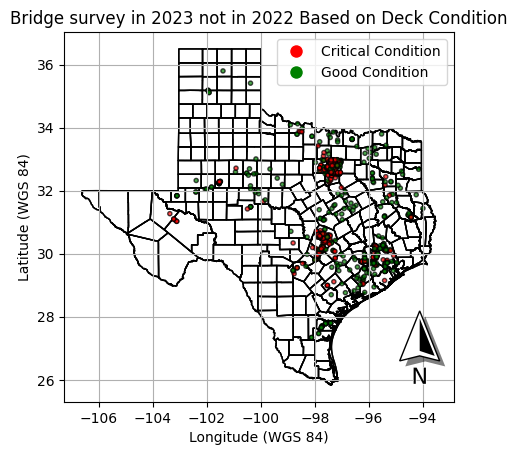

<Figure size 640x480 with 0 Axes>

In [202]:
#Visualize the overlay resultx

fig = plt.figure()
ax1 = fig.add_subplot() #we have multiple layers being added, so when we have to plot multiple layers on the plot, we need to make sure all of them are plotted on the same axis.
texas_wgs84.plot (facecolor='white', edgecolor='black', ax=ax1) #ax=ax1 - overlaping axis. 
texas_wgs84.plot(ax=ax1, color='none', markersize=1)
colors = df_2023_newA['Predicted_DECK_COND_058'].map({0: 'red', 1: 'green'})
plt.scatter(longitude,latitude, c=colors, marker='.', edgecolor='k', alpha=0.7, label='Bridge Locations')
mapu.north_arrow.north_arrow(ax=ax1, location='lower right', rotation={'degrees':0}) 
ax1.set_xlabel('Longitude (WGS 84)')
ax1.set_ylabel('Latitude (WGS 84)')
# Create a custom legend
# Create legend handles manually
red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Critical Condition', 
                        markerfacecolor='red', markersize=10)
green_patch = plt.Line2D([0], [0], marker='o', color='w', label='Good Condition', 
                          markerfacecolor='green', markersize=10)

# Add the custom legend to the plot
plt.legend(handles=[red_patch, green_patch], loc='upper right')
plt.grid()
plt.title('Bridge survey in 2023 not in 2022 Based on Deck Condition')
plt.show()
plt.savefig('bridge_2023_Deck_condition.png', dpi=300, bbox_inches='tight')

In [181]:
# Step 1: Prepare the input (independent) and output (dependent) variables from df_2023_2022A
X = df_2023_2022A[['ADT_029', 'DECK_AREA', 'MAX_SPAN_LEN_MT_048', 'AGE']]  # Independent variables
y = df_2023_2022A['SUPERSTRUCTURE_COND_059']  # Dependent variable

# Step 2: Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a pipeline that first imputes missing values and then fits the logistic regression model
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('logistic_regression', LogisticRegression())
])

# Step 4: Fit the model on the training data
pipeline.fit(X_train, y_train)

# Step 5: Evaluate the model on the test data from df_2023_2022A
y_pred = pipeline.predict(X_test)

print("Confusion Matrix (Training Data Test Set):")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report (Training Data Test Set):")
print(classification_report(y_test, y_pred))

X_new = df_2023_newA[['ADT_029', 'DECK_AREA', 'MAX_SPAN_LEN_MT_048', 'AGE']]  # Test set features

# Step 7: Make predictions on df_2023_newA
predictions_newA = pipeline.predict(X_new)


Confusion Matrix (Training Data Test Set):
[[2732   40]
 [ 119 4582]]

Classification Report (Training Data Test Set):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2772
           1       0.99      0.97      0.98      4701

    accuracy                           0.98      7473
   macro avg       0.97      0.98      0.98      7473
weighted avg       0.98      0.98      0.98      7473



C:\Users\Sushant\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [182]:
df_2023_newA['Predicted_SUPERSTRUCTURE_COND_059'] = predictions_newA

In [183]:
latitude = df_2023_newA['LAT_016']
longitude = df_2023_newA['LONG_017']

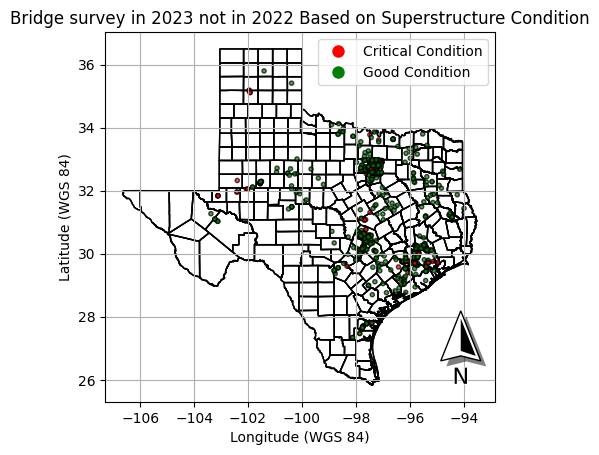

In [203]:
#Visualize the overlay resultx

fig = plt.figure()
ax1 = fig.add_subplot() #we have multiple layers being added, so when we have to plot multiple layers on the plot, we need to make sure all of them are plotted on the same axis.
texas_wgs84.plot (facecolor='white', edgecolor='black', ax=ax1) #ax=ax1 - overlaping axis. 
texas_wgs84.plot(ax=ax1, color='none', markersize=1)
colors = df_2023_newA['Predicted_SUPERSTRUCTURE_COND_059'].map({0: 'red', 1: 'green'})
plt.scatter(longitude,latitude, c=colors, marker='.', edgecolor='k', alpha=0.7, label='Bridge Locations')
mapu.north_arrow.north_arrow(ax=ax1, location='lower right', rotation={'degrees':0}) 
ax1.set_xlabel('Longitude (WGS 84)')
ax1.set_ylabel('Latitude (WGS 84)')
# Create a custom legend
# Create legend handles manually
red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Critical Condition', 
                        markerfacecolor='red', markersize=10)
green_patch = plt.Line2D([0], [0], marker='o', color='w', label='Good Condition', 
                          markerfacecolor='green', markersize=10)

# Add the custom legend to the plot
plt.legend(handles=[red_patch, green_patch], loc='upper right')
plt.grid()
plt.savefig('bridge_2023_Superstructure_condition.png', dpi=300, bbox_inches='tight')
plt.title('Bridge survey in 2023 not in 2022 Based on Superstructure Condition')
plt.show()

In [188]:
# Step 1: Prepare the input (independent) and output (dependent) variables from df_2023_2022A
X = df_2023_2022A[['ADT_029', 'DECK_AREA', 'MAX_SPAN_LEN_MT_048', 'AGE']]  # Independent variables
y = df_2023_2022A['CHANNEL_COND_061']  # Dependent variable

# Step 2: Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a pipeline that first imputes missing values and then fits the logistic regression model
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('logistic_regression', LogisticRegression())
])

# Step 4: Fit the model on the training data
pipeline.fit(X_train, y_train)

# Step 5: Evaluate the model on the test data from df_2023_2022A
y_pred = pipeline.predict(X_test)

print("Confusion Matrix (Training Data Test Set):")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report (Training Data Test Set):")
print(classification_report(y_test, y_pred))

X_new = df_2023_newA[['ADT_029', 'DECK_AREA', 'MAX_SPAN_LEN_MT_048', 'AGE']]  # Test set features

# Step 7: Make predictions on df_2023_newA
predictions_newA = pipeline.predict(X_new)

Confusion Matrix (Training Data Test Set):
[[ 828  608]
 [ 334 5703]]

Classification Report (Training Data Test Set):
              precision    recall  f1-score   support

           0       0.71      0.58      0.64      1436
           1       0.90      0.94      0.92      6037

    accuracy                           0.87      7473
   macro avg       0.81      0.76      0.78      7473
weighted avg       0.87      0.87      0.87      7473



In [195]:
df_2023_newA['Predicted_CHANNEL_COND_061'] = predictions_newA

In [196]:
latitude = df_2023_newA['LAT_016']
longitude = df_2023_newA['LONG_017']

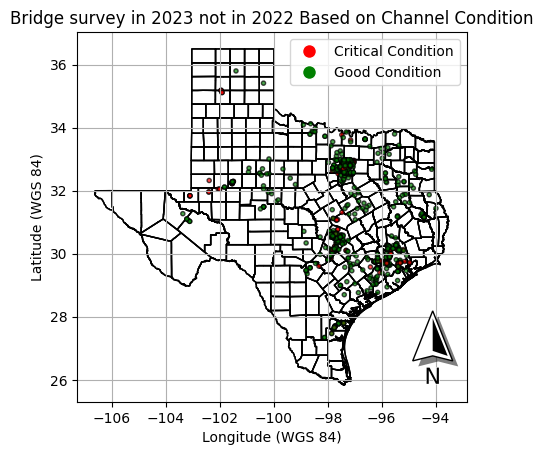

In [204]:
#Visualize the overlay resultx

fig = plt.figure()
ax1 = fig.add_subplot() #we have multiple layers being added, so when we have to plot multiple layers on the plot, we need to make sure all of them are plotted on the same axis.
texas_wgs84.plot (facecolor='white', edgecolor='black', ax=ax1) #ax=ax1 - overlaping axis. 
texas_wgs84.plot(ax=ax1, color='none', markersize=1)
colors = df_2023_newA['Predicted_CHANNEL_COND_061'].map({0: 'red', 1: 'green'})
plt.scatter(longitude,latitude, c=colors, marker='.', edgecolor='k', alpha=0.7, label='Bridge Locations')
mapu.north_arrow.north_arrow(ax=ax1, location='lower right', rotation={'degrees':0}) 
ax1.set_xlabel('Longitude (WGS 84)')
ax1.set_ylabel('Latitude (WGS 84)')
# Create a custom legend
# Create legend handles manually
red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Critical Condition', 
                        markerfacecolor='red', markersize=10)
green_patch = plt.Line2D([0], [0], marker='o', color='w', label='Good Condition', 
                          markerfacecolor='green', markersize=10)

# Add the custom legend to the plot
plt.legend(handles=[red_patch, green_patch], loc='upper right')
plt.grid()
plt.savefig('bridge_2023_Channel_condition.png', dpi=300, bbox_inches='tight')
plt.title('Bridge survey in 2023 not in 2022 Based on Channel Condition')
plt.show()